# Benchmark to explain MNIST DNN

In [7]:
import torch
import numpy as np
import shap
from utils import get_data_shap
shap.initjs()

In [3]:
%run dnn_load.py

              precision    recall  f1-score   support

           0     0.9458    0.9870    0.9660       690
           1     0.9848    0.9835    0.9841       789
           2     0.9682    0.9331    0.9503       717
           3     0.9495    0.9320    0.9407       706
           4     0.9236    0.9610    0.9420       667
           5     0.9322    0.9409    0.9365       643
           6     0.9696    0.9565    0.9630       667
           7     0.9318    0.9548    0.9432       730
           8     0.9431    0.9390    0.9410       688
           9     0.9555    0.9161    0.9354       703

    accuracy                         0.9507      7000
   macro avg     0.9504    0.9504    0.9502      7000
weighted avg     0.9510    0.9507    0.9507      7000



In [12]:
model

DNN(
  (lin0): Linear(in_features=784, out_features=300, bias=True)
  (bn0): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU()
  (lin1): Linear(in_features=300, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
)

In [8]:
train_x, train_y, test_x, test_y, Xt = get_data_shap(k=1000)

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([1000, 784])
torch.Size([1000])
torch.Size([3000, 784])
torch.Size([3000])


In [15]:
deepExplainer = shap.DeepExplainer(model, train_x)
ev = deepExplainer.expected_value
print(ev)

[-2.9123328 -2.7347016 -1.1870841 -2.3289142 -2.818882  -2.70379
 -2.8320515 -1.7224908 -1.4623779 -3.8085108]


In [17]:
try:
    with np.load('./npz/dnnshap1k.npz') as f:
        sv_sum = f['svsum']
        print('svsum loaded!')
except FileNotFoundError:
    print('computing svsum!')
    sv_sum = deepExplainer.shap_values(test_x)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [18]:
np.savez('./npz/dnnshap1k.npz', svsum=sv_sum)

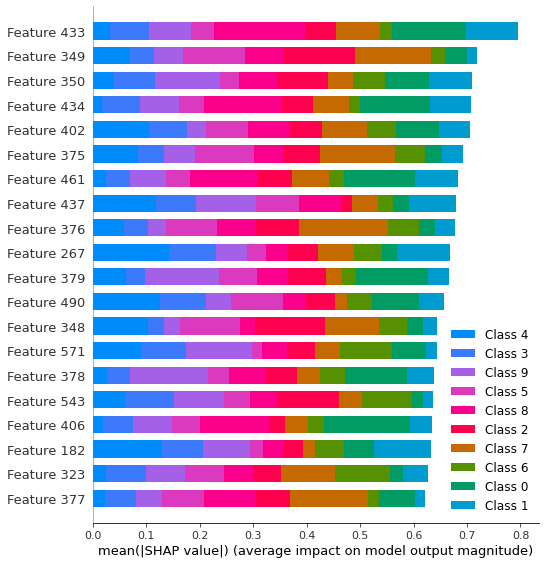

In [19]:
ss = shap.summary_plot(shap_values=sv_sum,
                        features=test_x,
                        plot_type='bar',
                        show=True)

In [20]:
svl = deepExplainer.shap_values(test_x[433].unsqueeze(0))

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [21]:
splt = shap.force_plot(base_value=ev[2],
                        shap_values=svl[2],
                        text_rotation=90,
                        show=True)

In [22]:
display(splt)